# Decision Trees

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Data and Analysis it**

In [2]:
data = pd.read_csv("penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


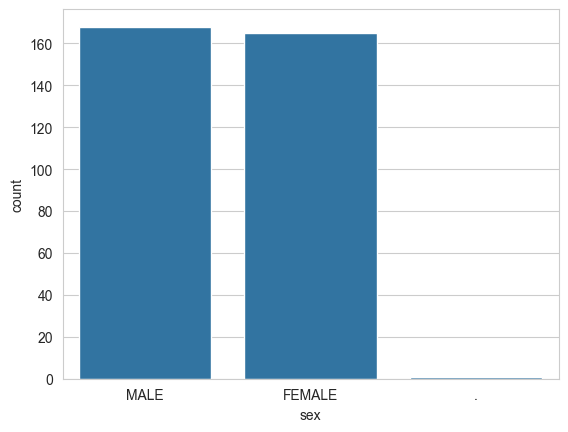

In [6]:
plt.figure(dpi=100)
sns.countplot(data, x='sex');

In [7]:
data[data["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
data[data["species"] == "Gentoo"].groupby("sex").describe().stack()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
sex                                                                  
.      count          1.000000         1.000000           1.000000   
       mean          44.500000        15.700000         217.000000   
       min           44.500000        15.700000         217.000000   
       25%           44.500000        15.700000         217.000000   
       50%           44.500000        15.700000         217.000000   
       75%           44.500000        15.700000         217.000000   
       max           44.500000        15.700000         217.000000   
FEMALE count         58.000000        58.000000          58.000000   
       mean          45.563793        14.237931         212.706897   
       std            2.051247         0.540249           3.897856   
       min           40.900000        13.100000         203.000000   
       25%           43.850000        13.800000         210.000000   
       50%           45.500000        14.250000         212.000000   
       75%           46.875000        14.600000         215.000000   
       max           50.500000        15.500000         222.000000   
MALE   count         61.000000        61.000000          61.000000   
       mean          49.473770        15.718033         221.540984   
       std            2.720594         0.741060           5.673252   
       min           44.400000        14.100000         208.000000   
       25%           48.100000        15.200000         218.000000   
       50%           49.500000        15.700000         221.000000   
       75%           50.500000        16.100000         225.000000   
       max           59.600000        17.300000         231.000000   

              body_mass_g  
sex                        
.      count     1.000000  
       mean   4875.000000  
       min    4875.000000  
       25%    4875.000000  
       50%    4875.000000  
       75%    4875.000000  
       max    4875.000000  
FEMALE count    58.000000  
       mean   4679.741379  
       std     281.578294  
       min    3950.000000  
       25%    4462.500000  
       50%    4700.000000  
       75%    4875.000000  
       max    5200.000000  
MALE   count    61.000000  
       mean   5484.836066  
       std     313.158596  
       min    4750.000000  
       25%    5300.000000  
       50%    5500.000000  
       75%    5700.000000  
       max    6300.000000

In [9]:
data.at[336, "sex"] = "FEMALE"

<Figure size 640x480 with 0 Axes>

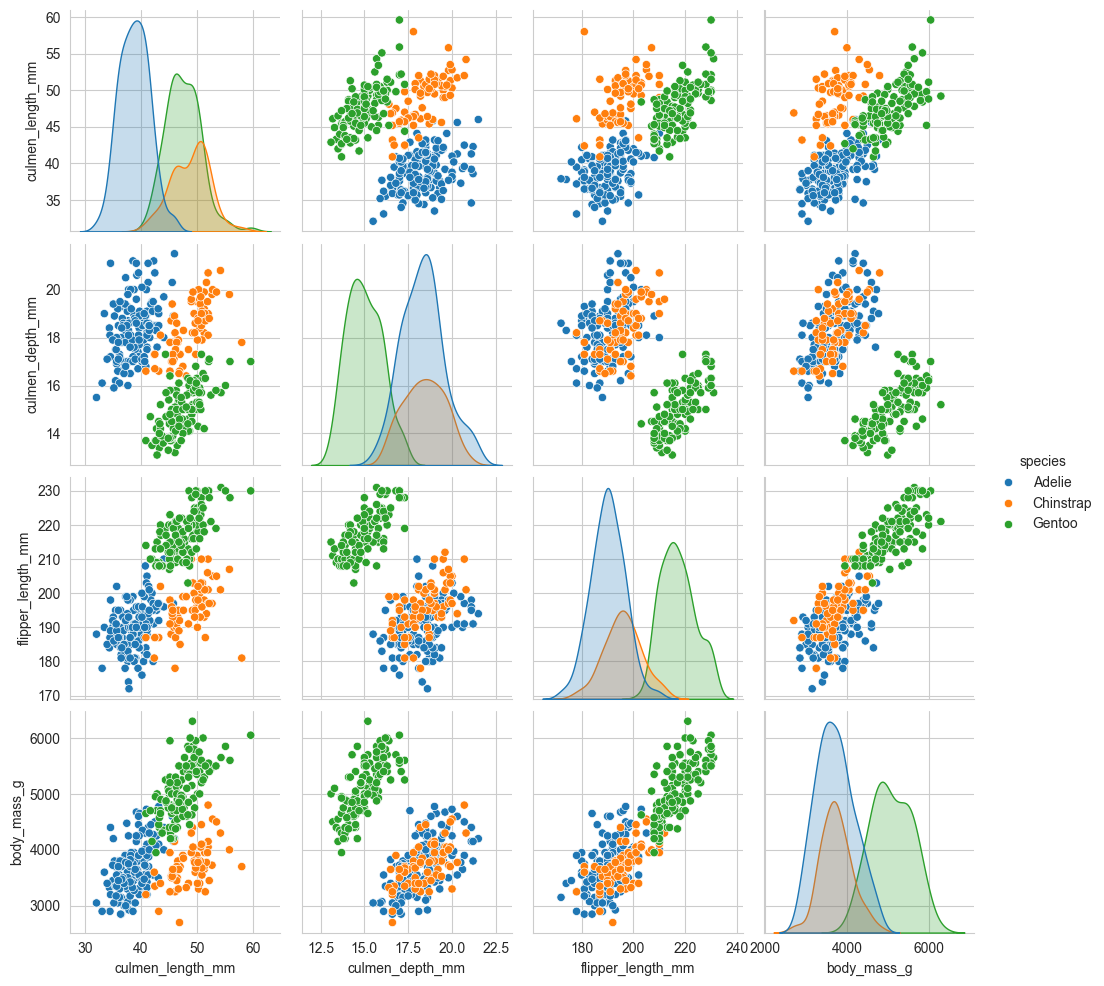

In [10]:
plt.figure(dpi=100)
sns.pairplot(data, hue="species");

**Converting the Categorical Data into the Dummy Variable and Splitting the data into the independent and dependent features**

In [11]:
x = pd.get_dummies(data.drop(columns="species"), drop_first=True)
y = data["species"]

**Splitting the Independent and Dependent Features into the Training and Testing Data**

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

**Implementing the Model with default parameters**

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

def report_model(model):
    model_prediction = model.predict(x_test)
    print("Classification Report:\n", classification_report(y_test, model_prediction))
    plt.figure(dpi=250)
    plot_tree(model, feature_names=x.columns, filled=True);

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.85      0.92        34
   Chinstrap       0.56      1.00      0.72         9
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.90        67
   macro avg       0.85      0.92      0.87        67
weighted avg       0.94      0.90      0.91        67


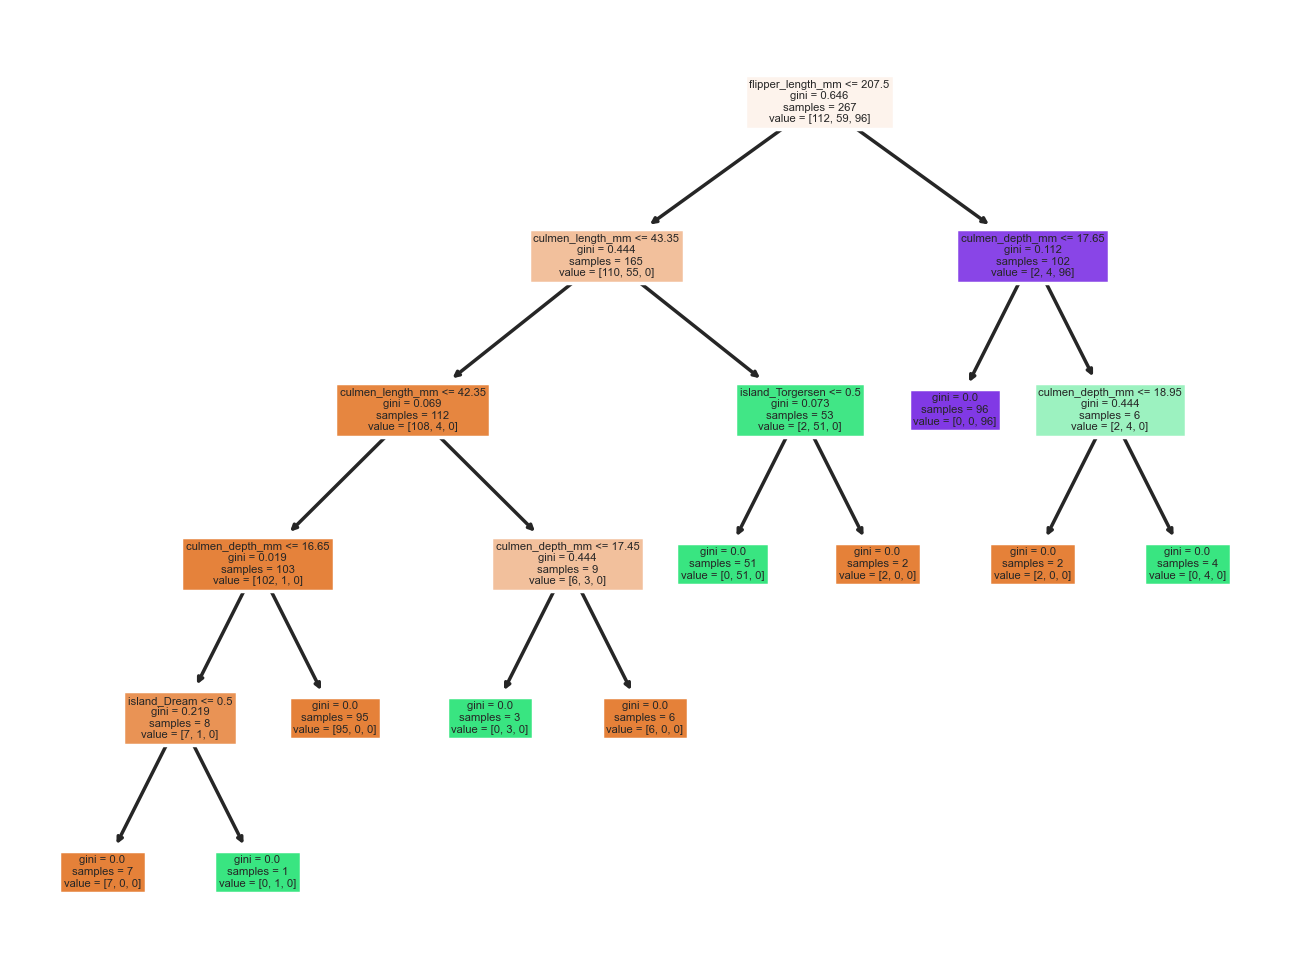

In [15]:
report_model(classifier)

**Implementing the Model of Max Depth "2"**

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.97      0.94      0.96        34
   Chinstrap       0.67      0.89      0.76         9
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.88      0.92      0.89        67
weighted avg       0.94      0.93      0.93        67


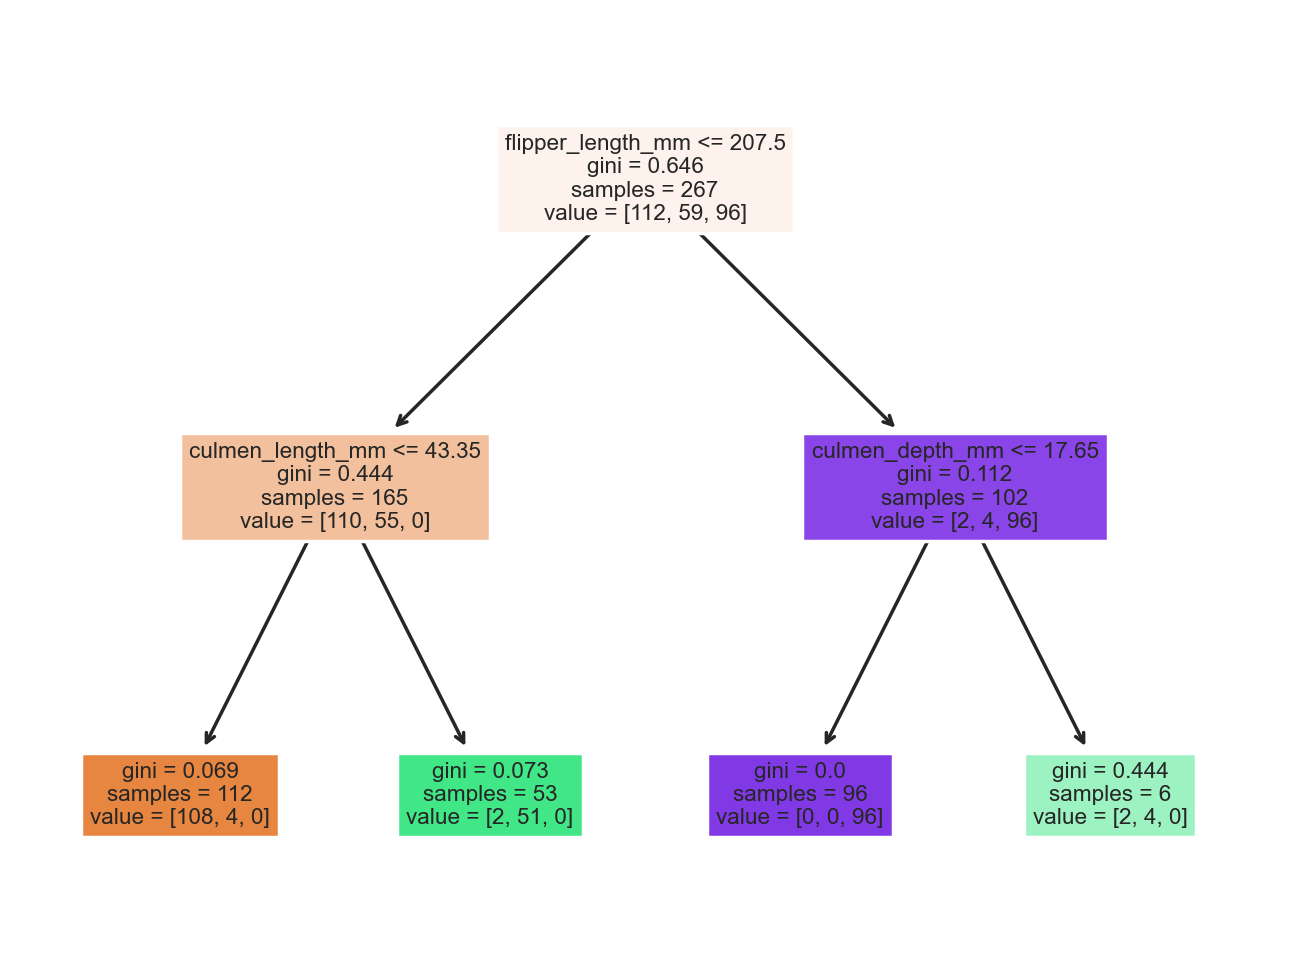

In [16]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train, y_train)
report_model(pruned_tree)

**Implementing the Model with Max Leaf Nodes "3"**

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.97      0.94      0.96        34
   Chinstrap       0.67      0.89      0.76         9
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.88      0.92      0.89        67
weighted avg       0.94      0.93      0.93        67


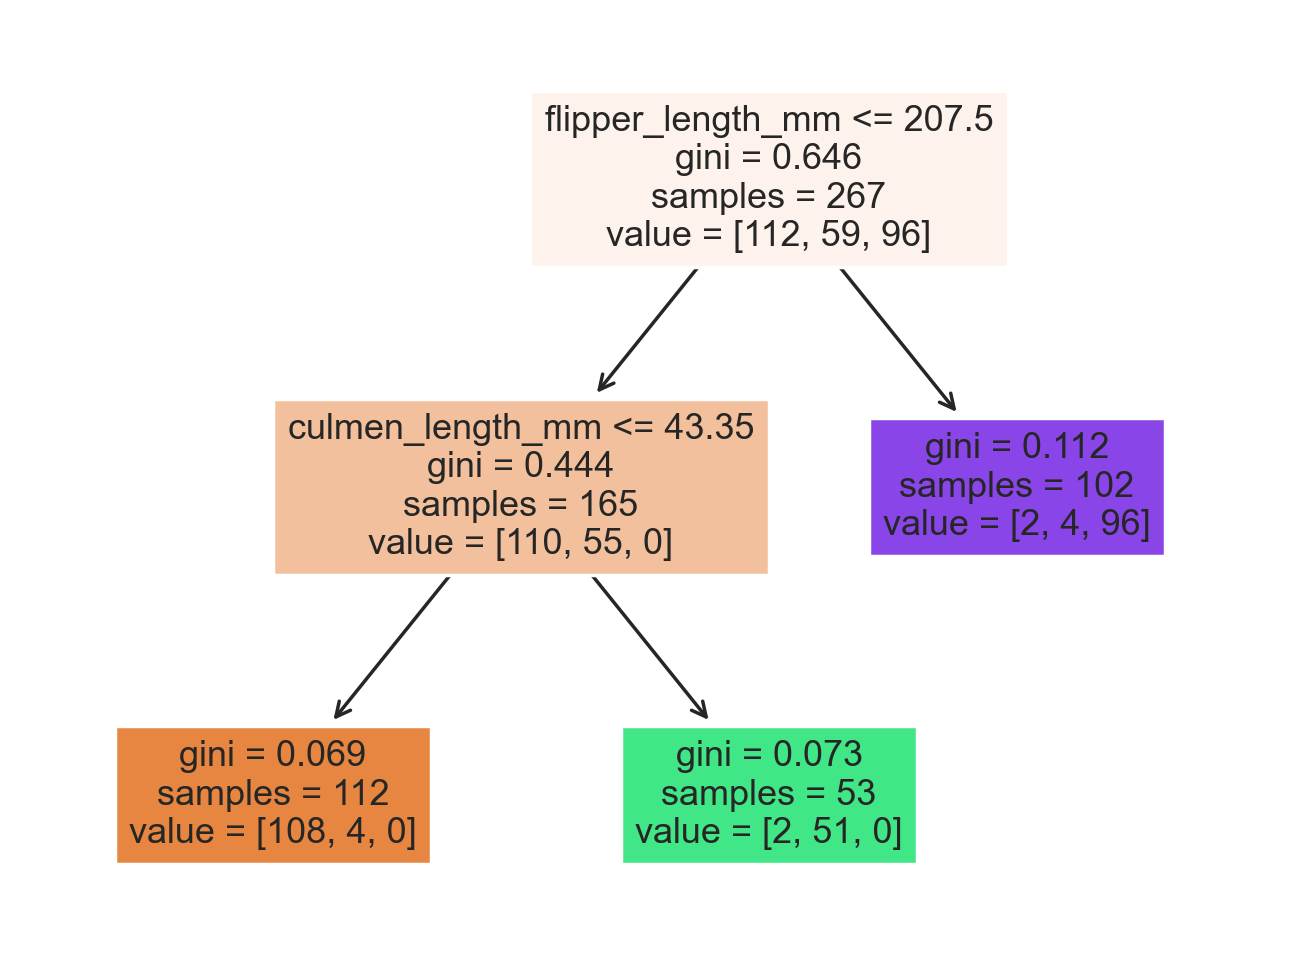

In [17]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)
max_leaf_tree.fit(x_train, y_train)
report_model(max_leaf_tree)

**Implementing the Model with criterion "entropy"**

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.94      0.94      0.94        34
   Chinstrap       0.82      1.00      0.90         9
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.94        67
   macro avg       0.92      0.95      0.93        67
weighted avg       0.95      0.94      0.94        67


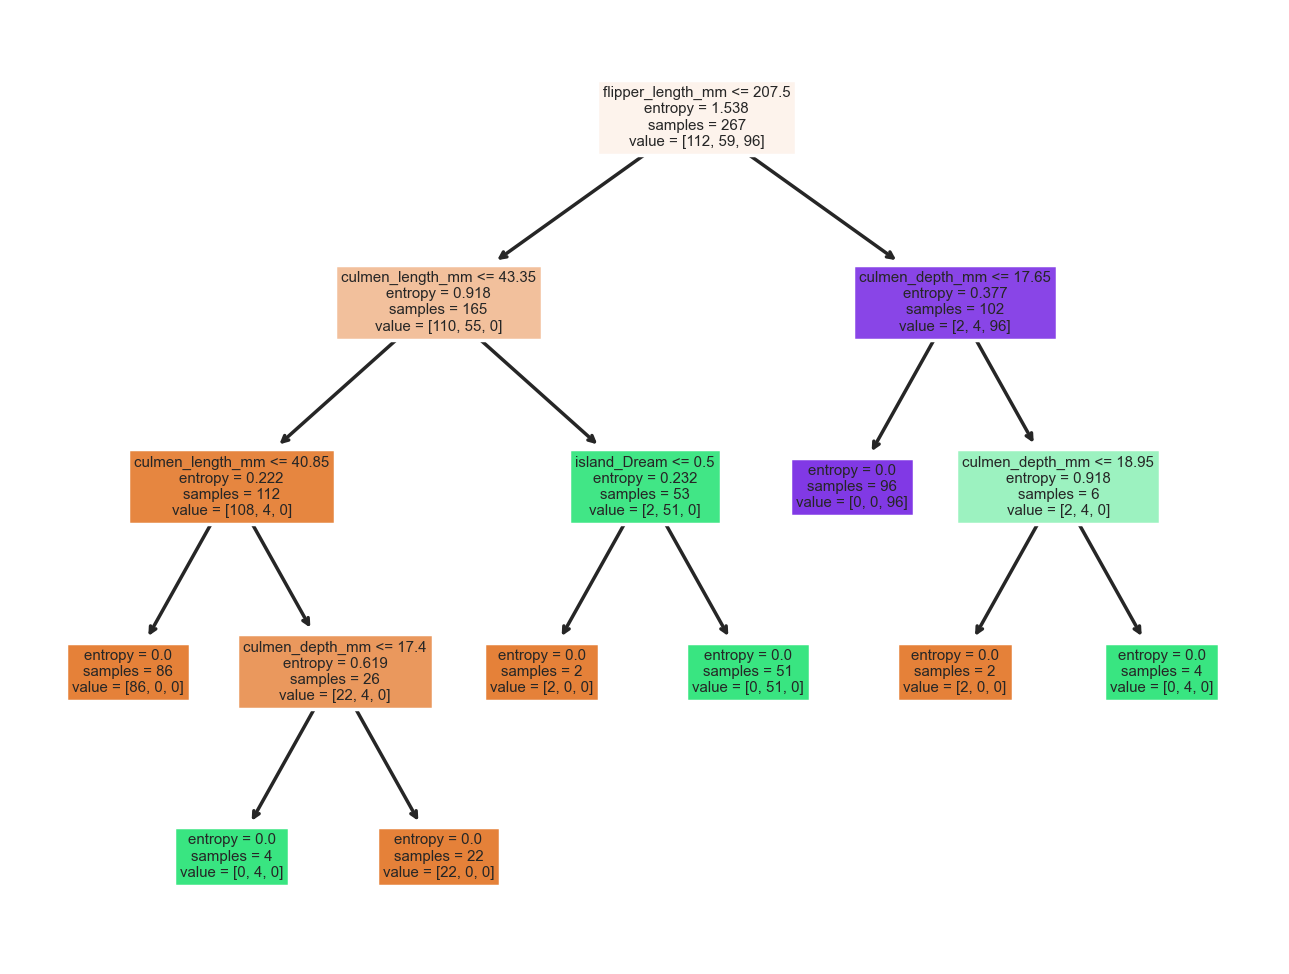

In [18]:
entropy_tree = DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(x_train, y_train)
report_model(entropy_tree)